# Importing data

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
import data_prep_utils as dpu
import AutoClean as ac
import warnings
import pandas as pd

import plotly.express as px
import seaborn as sns
import scipy as sc
import numpy as np
warnings.filterwarnings('ignore')
label_encoder = preprocessing.LabelEncoder()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# not cut columns
pd.set_option('display.max_columns',None)

account_df = pd.read_csv('data/account.csv',sep=';')
card_df = pd.read_csv('data/card_dev.csv', sep=';')
client_df = pd.read_csv('data/client.csv',sep=';')
disp_df = pd.read_csv('data/disp.csv',sep=';')
district_df = pd.read_csv('data/district.csv',sep=';')
loan_df = pd.read_csv('data/loan_dev.csv', sep=';')
trans_df = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
account_df_ac = pd.read_csv('data/account.csv',sep=';')
card_df_ac = pd.read_csv('data/card_dev.csv', sep=';')
client_df_ac = pd.read_csv('data/client.csv',sep=';')
disp_df_ac = pd.read_csv('data/disp.csv',sep=';')
district_df_ac = pd.read_csv('data/district.csv',sep=';')
loan_df_ac = pd.read_csv('data/loan_dev.csv', sep=';')
trans_df_ac = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)

# Account Stats

#### Data cleaning, transformation and data quality changes : manual

In [ ]:
print(account_df)
account_df.rename(columns={'frequency':'account_frequency'}, inplace=True)
account_df.rename(columns={'date':'account_date'}, inplace=True)

account_df.loc[account_df['account_frequency'] == 'monthly issuance', 'account_frequency'] = 'monthly'
account_df.loc[account_df['account_frequency'] == 'weekly issuance', 'account_frequency'] = 'weekly'
account_df.loc[account_df['account_frequency'] == 'issuance after transaction', 'account_frequency'] = 'after-transaction'


      account_id  district_id         frequency    date
0            576           55  monthly issuance  930101
1           3818           74  monthly issuance  930101
2            704           55  monthly issuance  930101
3           2378           16  monthly issuance  930101
4           2632           24  monthly issuance  930102
...          ...          ...               ...     ...
4495         124           55  monthly issuance  971228
4496        3958           59  monthly issuance  971228
4497         777           30  monthly issuance  971228
4498        1573           63  monthly issuance  971229
4499        3276            1  monthly issuance  971229

[4500 rows x 4 columns]


In [ ]:

#Frequency from text data to numerical
account_df['account_frequency']= label_encoder.fit_transform(account_df['account_frequency'])



account_df['account_date'] = pd.to_datetime(account_df['account_date'], format='%y%m%d')

acount_date_year = []
for i in account_df.index:
    acount_date_year.append(account_df['account_date'][i].year)

account_df['account_year'] = acount_date_year
#account_df.drop(columns=account_df.columns[0], axis=1, inplace=True)
print(account_df.head())
account_df.to_csv('refined/account.csv',sep=';',index=False)

   account_id  district_id  account_frequency account_date  account_year
0         576           55                  1   1993-01-01          1993
1        3818           74                  1   1993-01-01          1993
2         704           55                  1   1993-01-01          1993
3        2378           16                  1   1993-01-01          1993
4        2632           24                  1   1993-01-02          1993


#### Data cleaning, transformation and data quality changes : ac

In [16]:
print(account_df_ac)
account_df_ac.rename(columns={'frequency':'account_frequency'}, inplace=True)
account_df_ac.rename(columns={'date':'account_date'}, inplace=True)

account_df_ac.loc[account_df_ac['account_frequency'] == 'monthly issuance', 'account_frequency'] = 'monthly'
account_df_ac.loc[account_df_ac['account_frequency'] == 'weekly issuance', 'account_frequency'] = 'weekly'
account_df_ac.loc[account_df_ac['account_frequency'] == 'issuance after transaction', 'account_frequency'] = 'after-transaction'


account_df_ac['account_date'] = pd.to_datetime(account_df_ac['account_date'], format='%y%m%d')
#dpu.auto_clean(account_df_ac,"onehot")
pipeline =ac.AutoClean(account_df_ac,encode_categ="onehot",outliers=False,verbose=True)
account_df_ac = pipeline.output
account_df_ac['account_frequency']= label_encoder.fit_transform(account_df_ac['account_frequency'])
#account_df_ac['account_frequency']= label_encoder.fit_transform(account_df_ac['account_frequency'])
account_df_ac.to_csv('refined_ac/account.csv',sep=';',index=False)


25-11-2022 22:33:32.28 - INFO - Started validation of input parameters...
25-11-2022 22:33:32.28 - INFO - Completed validation of input parameters
25-11-2022 22:33:32.29 - INFO - Started handling of duplicates... Method: "AUTO"
25-11-2022 22:33:32.29 - DEBUG - 0 missing values found
25-11-2022 22:33:32.29 - INFO - Completed handling of duplicates in 0.003811 seconds
25-11-2022 22:33:32.29 - INFO - Started handling of missing values...
25-11-2022 22:33:32.29 - DEBUG - 0 missing values found
25-11-2022 22:33:32.30 - INFO - Completed handling of missing values in 0.003257 seconds
25-11-2022 22:33:32.30 - INFO - Started handling of outliers... Method: "WINZ"


      account_id  district_id         frequency    date
0            576           55  monthly issuance  930101
1           3818           74  monthly issuance  930101
2            704           55  monthly issuance  930101
3           2378           16  monthly issuance  930101
4           2632           24  monthly issuance  930102
...          ...          ...               ...     ...
4495         124           55  monthly issuance  971228
4496        3958           59  monthly issuance  971228
4497         777           30  monthly issuance  971228
4498        1573           63  monthly issuance  971229
4499        3276            1  monthly issuance  971229

[4500 rows x 4 columns]


25-11-2022 22:33:32.50 - DEBUG - Outlier imputation of 330 value(s) succeeded for feature "account_id"
25-11-2022 22:33:32.50 - INFO - Completed handling of outliers in 0.205397 seconds
25-11-2022 22:33:32.50 - INFO - Started conversion of DATETIME features... Granularity: s
25-11-2022 22:33:32.63 - DEBUG - Conversion to DATETIME succeeded for feature "account_date"
25-11-2022 22:33:32.64 - INFO - Completed conversion of DATETIME features in 0.1339 seconds
25-11-2022 22:33:32.64 - INFO - Started encoding categorical features... Method: "AUTO"
25-11-2022 22:33:32.64 - DEBUG - Skipped encoding for DATETIME feature "account_date"
25-11-2022 22:33:32.65 - DEBUG - Encoding to ONEHOT succeeded for feature "account_frequency"
25-11-2022 22:33:32.65 - INFO - Completed encoding of categorical features in 0.007594 seconds
25-11-2022 22:33:32.65 - INFO - Started feature type conversion...
25-11-2022 22:33:32.65 - DEBUG - Conversion to type INT succeeded for feature "account_id"
25-11-2022 22:33:3

Logfile saved to: /home/wolfcuanhamarws/Desktop/Faculdade/2023/AC/Project/AC-Project/Notebooks/crisp_dm_sprint_3_4/autoclean.log


# Client Processing


#### Data cleaning, transformation and data quality changes

In [4]:
client_df_ac = pd.read_csv('data/client.csv',sep=';')
client_df.rename(columns={'district_id':'client_district_id'}, inplace=True)
client_df.rename(columns={'birth_number':'client_birth_number'}, inplace=True)


age = []
gender = []
birth = []
get_birth_date = lambda x : pd.to_datetime('19'+str(x)[0:2] + str(x)[2:4] + str(x)[4:6])
for x in client_df['client_birth_number']:
    month = int(str(x)[2:4])
    if month > 12:
        gender.append('F')
        x -= 5000
    else:
        gender.append('M')
    
    birth_date = get_birth_date(x)
    birth.append(birth_date)
    age.append((datetime.now() - birth_date).days // 365)

client_df['client_birth_number'] = birth

birth_year = []
for i in client_df.index:
    birth_year.append(client_df['client_birth_number'][i].year)

client_df['birth_year'] = birth_year
    
print(client_df.head())

client_df['client_age'] = age
client_df['client_gender'] = gender


client_df['client_gender']= label_encoder.fit_transform(client_df['client_gender'])

client_df.to_csv('refined/client.csv',sep=';',index=False)

   client_id client_birth_number  client_district_id  birth_year
0          1          1970-12-13                  18        1970
1          2          1945-02-04                   1        1945
2          3          1940-10-09                   1        1940
3          4          1956-12-01                   5        1956
4          5          1960-07-03                   5        1960


#### Data cleaning, transformation and data quality changes ac

In [17]:
client_df_ac = pd.read_csv('data/client.csv',sep=';')
client_df_ac.rename(columns={'district_id':'client_district_id'}, inplace=True)
client_df_ac.rename(columns={'birth_number':'client_birth_number'}, inplace=True)


age = []
gender = []
birth = []
get_birth_date = lambda x : pd.to_datetime('19'+str(x)[0:2] + str(x)[2:4] + str(x)[4:6])
for x in client_df_ac['client_birth_number']:
    month = int(str(x)[2:4])
    if month > 12:
        gender.append('F')
        x = x - 5000
    else:
        gender.append('M')
    
    birth_date = get_birth_date(x)
    birth.append(birth_date)
    age.append((datetime.now() - birth_date).days // 365)

client_df_ac['client_birth_number'] = birth

birth_year = []
for i in client_df_ac.index:
    birth_year.append(client_df_ac['client_birth_number'][i].year)

client_df_ac['birth_year'] = birth_year
    
print(client_df_ac.head())

client_df_ac['client_age'] = age
client_df_ac['client_gender'] = gender


client_df_ac['client_gender']= label_encoder.fit_transform(client_df_ac['client_gender'])
client_df_ac.drop(columns=["client_birth_number"], axis=1, inplace=True)

dpu.auto_clean(client_df_ac,"onehot")

client_df_ac.to_csv('refined_ac/client.csv',sep=';',index=False)
client_df_ac.head()

25-11-2022 22:33:37.23 - INFO - Started validation of input parameters...
25-11-2022 22:33:37.23 - INFO - Completed validation of input parameters
25-11-2022 22:33:37.23 - INFO - Started handling of duplicates... Method: "AUTO"
25-11-2022 22:33:37.24 - DEBUG - 0 missing values found
25-11-2022 22:33:37.24 - INFO - Completed handling of duplicates in 0.002458 seconds
25-11-2022 22:33:37.24 - INFO - Started handling of missing values...
25-11-2022 22:33:37.24 - DEBUG - 0 missing values found
25-11-2022 22:33:37.24 - INFO - Completed handling of missing values in 0.001492 seconds
25-11-2022 22:33:37.24 - INFO - Started handling of outliers... Method: "WINZ"


   client_id client_birth_number  client_district_id  birth_year
0          1          1970-12-13                  18        1970
1          2          1945-02-04                   1        1945
2          3          1940-10-09                   1        1940
3          4          1956-12-01                   5        1956
4          5          1960-07-03                   5        1960
Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   client_id           5369 non-null   int64
 1   client_district_id  5369 non-null   int64
 2   birth_year          5369 non-null   int64
 3   client_age          5369 non-null   int64
 4   client_gender       5369 non-null   int64
dtypes: int64(5)
memory usage: 209.9 KB


Info: 
 None


Shape 
 (5369, 5)


Types: 
 client_id             int64
client_district_id    int64
birth_year 

25-11-2022 22:33:37.49 - DEBUG - Outlier imputation of 402 value(s) succeeded for feature "client_id"
25-11-2022 22:33:37.50 - INFO - Completed handling of outliers in 0.254945 seconds
25-11-2022 22:33:37.50 - INFO - Started conversion of DATETIME features... Granularity: s
25-11-2022 22:33:37.50 - INFO - Completed conversion of DATETIME features in 0.0004 seconds
25-11-2022 22:33:37.50 - INFO - Started encoding categorical features... Method: "AUTO"
25-11-2022 22:33:37.50 - INFO - Completed encoding of categorical features in 1e-06 seconds
25-11-2022 22:33:37.50 - INFO - Started feature type conversion...
25-11-2022 22:33:37.50 - DEBUG - Conversion to type INT succeeded for feature "client_id"
25-11-2022 22:33:37.50 - DEBUG - Conversion to type INT succeeded for feature "client_district_id"
25-11-2022 22:33:37.51 - DEBUG - Conversion to type INT succeeded for feature "birth_year"
25-11-2022 22:33:37.51 - DEBUG - Conversion to type INT succeeded for feature "client_age"
25-11-2022 22:3

Logfile saved to: /home/wolfcuanhamarws/Desktop/Faculdade/2023/AC/Project/AC-Project/Notebooks/crisp_dm_sprint_3_4/autoclean.log






Info after cleaning: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   client_id           5369 non-null   int64
 1   client_district_id  5369 non-null   int64
 2   birth_year          5369 non-null   int64
 3   client_age          5369 non-null   int64
 4   client_gender       5369 non-null   int64
dtypes: int64(5)
memory usage: 209.9 KB


Info: 
 None


Shape 
 (5369, 5)


Types: 
 client_id             int64
client_district_id    int64
birth_year            int64
client_age            int64
client_gender         int64
dtype: object


Description: 
           client_id  client_district_id   birth_year   client_age  \
count   5369.000000         5369.000000  5369.000000  5369.000000   
mean    3359

,client_id,client_district_id,birth_year,client_age,client_gender
0,1,18,1970,51,0
1,2,1,1945,77,1
2,3,1,1940,82,0
3,4,5,1956,66,1
4,5,5,1960,62,0


# Disposition Processing

#### Data cleaning, transformation and data quality changes

In [5]:
# disp_df = disp_df.loc[disp_df.type == "OWNER"]
# disp_df.drop(columns=['type'], inplace=True)
# disp_df.rename(columns={'type':'disp_type'}, inplace=True)
print(disp_df.isnull().sum())
disp_df.to_csv('refined/disposition.csv',sep=';',index=False)

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


#### Data cleaning, transformation and data quality changes ac

In [26]:
disp_df_ac = pd.read_csv('data/disp.csv',sep=';')
pipeline = ac.AutoClean(disp_df_ac,mode='manual',verbose=True,encode_categ="onehot",outliers=False)
disp_df_ac = pipeline.output # duplicates were removed
disp_df_ac.rename(columns={'type':'ownership_account_type'}, inplace=True)
disp_df_ac['ownership_account_type']= label_encoder.fit_transform(disp_df_ac['ownership_account_type'])
disp_df_ac.to_csv('refined_ac/disp.csv',sep=';',index=False)


25-11-2022 22:36:54.97 - INFO - Started validation of input parameters...


ValueError: Invalid value for "encode_categ" parameter.

# Transaction Processing

#### Data cleaning, transformation and data quality changes

In [ ]:
trans_df.rename(columns={'date' : 'trans_date'}, inplace=True)
trans_df.rename(columns={'type' : 'trans_type'}, inplace=True)
trans_df.rename(columns={'operation' : 'trans_operation'}, inplace=True)
trans_df.rename(columns={'amount' : 'trans_amount'}, inplace=True)
trans_df.rename(columns={'balance' : 'trans_balance'}, inplace=True)
trans_df.rename(columns={'k_symbol' : 'trans_k_symbol'}, inplace=True)
trans_df.rename(columns={'bank' : 'trans_bank'}, inplace=True)
trans_df.rename(columns={'account': 'trans_account'}, inplace=True)

trans_df['trans_date'] = pd.to_datetime(trans_df['trans_date'], format='%y%m%d')

trans_date_year = []
trans_date_month = []
trans_date_day = []
for i in trans_df.index:
    trans_date_year.append(trans_df['trans_date'][i].year)
    trans_date_month.append(trans_df['trans_date'][i].month)
    trans_date_day.append(trans_df['trans_date'][i].day)

trans_df['trans_year'] = trans_date_year
trans_df['trans_month'] = trans_date_month
trans_df['trans_day'] = trans_date_day

#as colunas bank e account não são necessárias, trans_k_symbol têm muitos valores nulos
trans_df.drop(['trans_bank', 'trans_account', 'trans_k_symbol'], axis=1, inplace=True)
#TODO: apontar isto em data understanding: get the all rows with operation null on that count:
# The rows with type credit and the rows with interest credited count them and see if they are the same
#substituting missing values in "operation"
trans_df ['trans_operation'].fillna ('interest_credit', inplace = True)
# operations are null when the the type is credit and k_symbol interest credited , so we put on operation , a new operation name: interest_credit
trans_df.loc[trans_df["trans_operation"].isnull(),"trans_operation"] = "interest_credit"
#se for withdrawal, o ammount é negativo
trans_df.loc[trans_df["trans_type"]=="withdrawal","trans_amount"] *= -1
trans_df.loc[trans_df["trans_type"]=="withdrawal in cash","trans_amount"] *= -1

print(trans_df.head())


trans_df.to_csv('refined/transaction.csv',sep=';',index=False)

   trans_id  account_id trans_date trans_type               trans_operation  \
0   1548749        5270 1993-01-13     credit                credit in cash   
1   1548750        5270 1993-01-14     credit  collection from another bank   
2   3393738       11265 1993-01-14     credit                credit in cash   
3   3122924       10364 1993-01-17     credit                credit in cash   
4   1121963        3834 1993-01-19     credit                credit in cash   

   trans_amount  trans_balance  trans_year  trans_month  trans_day  
0         800.0          800.0        1993            1         13  
1       44749.0        45549.0        1993            1         14  
2        1000.0         1000.0        1993            1         14  
3        1100.0         1100.0        1993            1         17  
4         700.0          700.0        1993            1         19  


#### Data cleaning, transformation and data quality changes ac

In [5]:
trans_df_ac.rename(columns={'date' : 'trans_date'}, inplace=True)
trans_df_ac.rename(columns={'type' : 'trans_type'}, inplace=True)
trans_df_ac.rename(columns={'operation' : 'trans_operation'}, inplace=True)
trans_df_ac.rename(columns={'amount' : 'trans_amount'}, inplace=True)
trans_df_ac.rename(columns={'balance' : 'trans_balance'}, inplace=True)
trans_df_ac.rename(columns={'k_symbol' : 'trans_k_symbol'}, inplace=True)
trans_df_ac.rename(columns={'bank' : 'trans_bank'}, inplace=True)
trans_df_ac.rename(columns={'account': 'trans_account'}, inplace=True)

trans_df_ac['trans_date'] = pd.to_datetime(trans_df_ac['trans_date'], format='%y%m%d')
# transmorf dates int o 3 columns : feature engineering
trans_date_year = []
trans_date_month = []
#trans_date_day = []
for i in trans_df.index:
    trans_date_year.append(trans_df_ac['trans_date'][i].year)
    trans_date_month.append(trans_df_ac['trans_date'][i].month)
    #trans_date_day.append(trans_df['trans_date'][i].day)

trans_df_ac['trans_year'] = trans_date_year
trans_df_ac['trans_month'] = trans_date_month
#trans_df_ac['trans_day'] = trans_date_day
#TODO: apontar isto em data understanding: get the all rows with operation null on that count:
# operations are null when the the type is credit and k_symbol interest credited , so we put on operation , a new operation name: interest_credit
# The rows with type credit and the rows with interest credited count them and see if they are the same
#substituting missing values in "operation"


trans_df_ac.loc[trans_df_ac["trans_operation"].isnull(),"trans_operation"] = "interest_credit"

#Fill empty values with nan so we can count them
trans_df_ac.fillna(np.NaN, inplace = True) #filling the null values with NaN so we can do operations on them
#count null values
trans_df_ac.isnull().sum()
trans_df_ac.drop(['trans_bank', 'trans_account'], axis=1, inplace=True)
dpu.auto_clean(trans_df_ac,mode ="auto",verbose=True,encode_categ="onehot") #cleaning the transaction dataset
trans_df_ac.to_csv('refined_ac/transaction.csv',sep=';',index=False)

trans_id                0
account_id              0
trans_date              0
trans_type              0
trans_operation         0
trans_amount            0
trans_balance           0
trans_k_symbol     185244
trans_bank         299443
trans_account      294456
trans_year              0
trans_month             0
dtype: int64

Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396685 entries, 0 to 396684
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   trans_id         396685 non-null  int64         
 1   account_id       396685 non-null  int64         
 2   trans_date       396685 non-null  datetime64[ns]
 3   trans_type       396685 non-null  object        
 4   trans_operation  396685 non-null  object        
 5   trans_amount     396685 non-null  float64       
 6   trans_balance    396685 non-null  float64       
 7   trans_k_symbol   211441 non-null  object        
 8   trans_year       396685 non-null  int64         
 9   trans_month      396685 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 30.3+ MB


Info: 
 None


Shape 
 (396685, 10)


Types: 
 trans_id                    int64
account_id                  int64
trans_date         d

25-11-2022 21:45:59.96 - INFO - Started validation of input parameters...
25-11-2022 21:45:59.96 - INFO - Completed validation of input parameters
25-11-2022 21:45:59.97 - INFO - Started handling of duplicates... Method: "AUTO"
25-11-2022 21:46:00.15 - DEBUG - 0 missing values found
25-11-2022 21:46:00.15 - INFO - Completed handling of duplicates in 0.180908 seconds
25-11-2022 21:46:00.16 - INFO - Started handling of missing values...
25-11-2022 21:46:00.26 - INFO - Found a total of 185244 missing value(s)
25-11-2022 21:46:00.40 - INFO - Started handling of NUMERICAL missing values... Method: "AUTO"
25-11-2022 21:46:01.32 - INFO - Started handling of CATEGORICAL missing values... Method: "AUTO"
25-11-2022 21:54:04.26 - WARNING - KNN imputation failed for feature "trans_k_symbol"
25-11-2022 21:54:04.26 - INFO - Completed handling of missing values in 484.105469 seconds
25-11-2022 21:54:04.27 - INFO - Started handling of outliers... Method: "WINZ"


#### Data cleaning, transformation and data quality changes to check if we decide to use k_symbol using some techniques for null values

In [ ]:
# trans_df.rename(columns={'date' : 'trans_date'}, inplace=True)
# trans_df.rename(columns={'type' : 'trans_type'}, inplace=True)
# trans_df.rename(columns={'operation' : 'trans_operation'}, inplace=True)
# trans_df.rename(columns={'amount' : 'trans_amount'}, inplace=True)
# trans_df.rename(columns={'balance' : 'trans_balance'}, inplace=True)
# trans_df.rename(columns={'k_symbol' : 'trans_k_symbol'}, inplace=True)
# trans_df.rename(columns={'bank' : 'trans_bank'}, inplace=True)
# trans_df.rename(columns={'account': 'trans_account'}, inplace=True)

# trans_df['trans_date'] = pd.to_datetime(trans_df['trans_date'], format='%y%m%d')

# trans_date_year = []
# for i in trans_df.index:
#     trans_date_year.append(trans_df['trans_date'][i].year)

# trans_df['trans_year'] = trans_date_year
# print(trans_df.head())

# #as colunas bank e account não são necessárias, trans_k_symbol têm muitos valores nulos
# #trans_df.drop(['trans_bank', 'trans_account', ], axis=1)

# #withdrawal in cash para withdrawal
# trans_df.loc[trans_df["trans_type"]=="withdrawal in cash","trans_type"] = "withdrawal" 
# trans_df.loc[trans_df["trans_operation"].isnull(),"trans_operation"] = "other_type"
# #se for withdrawal, o ammount é negativo
# trans_df.loc[trans_df["trans_type"]=="withdrawal","trans_amount"] *= -1



# trans_df.to_csv('refined/transaction.csv',sep=';',index=False)


# Loan Processing

#### Data cleaning, transformation and data quality changes

In [ ]:

loan_df.rename(columns={'date':'loan_date'}, inplace=True)
loan_df.rename(columns={'amount':'loan_amount'}, inplace=True)
loan_df.rename(columns={'duration':'loan_duration'}, inplace=True)
loan_df.rename(columns={'payments':'loan_payments'}, inplace=True)
loan_df.rename(columns={'status':'loan_status'}, inplace=True)
loan_df.loc[loan_df["loan_status"]== -1,"loan_status"] *= 0

loan_df['loan_date'] = pd.to_datetime(loan_df['loan_date'], format='%y%m%d')

loan_date_year = []
for i in loan_df.index:
    loan_date_year.append(loan_df['loan_date'][i].year)
loan_df['loan_year'] = loan_date_year

loan_df.to_csv('refined/loan.csv',sep=';',index=False)

#### Data cleaning, transformation and data quality changes

In [ ]:
dpu.auto_clean(loan_df_ac)
loan_df.to_csv('refined_ac/loan.csv',sep=';',index=False)

# Credit Card Processing

#### Data cleaning, transformation and data quality changes

In [ ]:
card_df.rename(columns={'type' : 'card_type'}, inplace=True)
card_df.rename(columns={'issued' : 'card_issued'}, inplace=True)


card_df['card_issued'] = pd.to_datetime(card_df['card_issued'], format='%y%m%d')

issued_year = []
for i in card_df.index:
    issued_year.append(card_df['card_issued'][i].year)
card_df['car_issued_year'] = issued_year


card_df.to_csv('refined/card.csv',sep=';',index=False)

#### Data cleaning, transformation and data quality changes ac

In [ ]:

dpu.auto_clean(card_df_ac)
card_df.to_csv('refined_ac/card.csv',sep=';',index=False)

# District (demograph) Processing

#### Data cleaning, transformation and data quality changes

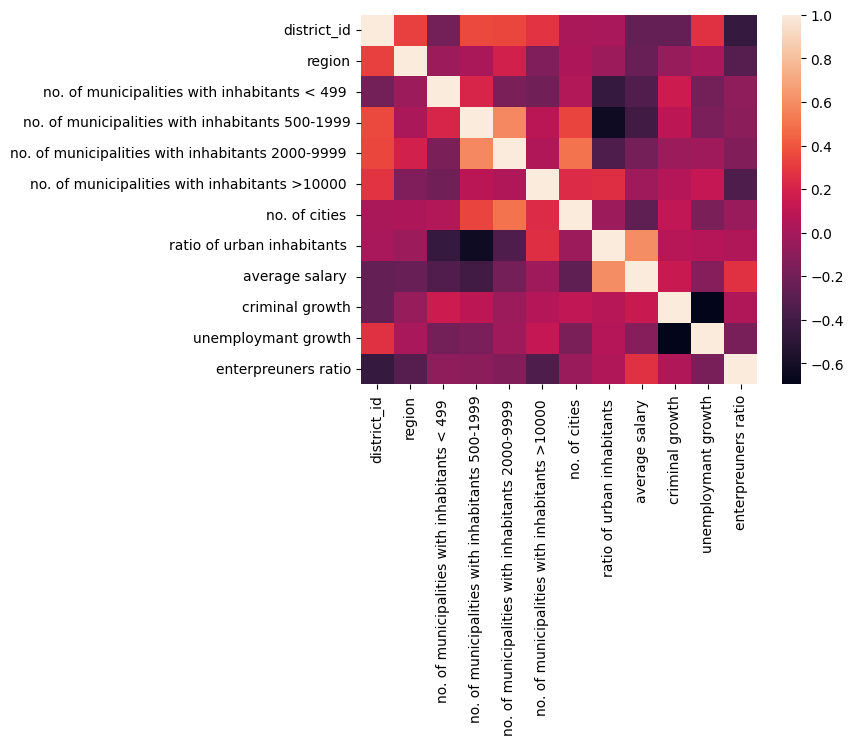

In [ ]:
district_df.rename(columns={'code ' : 'district_id'}, inplace=True)
district_df["unemploymant rate '95 "] = pd.to_numeric(district_df["unemploymant rate '95 "], errors='coerce')
#filling NA values with mean
district_df["unemploymant rate '95 "].fillna(district_df["unemploymant rate '95 "].mean(), inplace=True)

district_df["no. of commited crimes '95 "] = pd.to_numeric(district_df["no. of commited crimes '95 "], errors='coerce')
#filling NA values with mean
district_df["no. of commited crimes '95 "].fillna(district_df["no. of commited crimes '95 "].mean(), inplace=True)

#growths
district_df["criminal growth"] = (district_df["no. of commited crimes '96 "] - district_df["no. of commited crimes '95 "]) / district_df["no. of inhabitants"]
district_df['unemploymant growth'] = district_df["unemploymant rate '96 "] - district_df["unemploymant rate '95 "]

#simplifying ratios lmao
district_df['enterpreuners ratio'] = district_df['no. of enterpreneurs per 1000 inhabitants '] / 1000
district_df['ratio of urban inhabitants '] = district_df['ratio of urban inhabitants '] / 100

#Region attribute to numerical
district_df['region']= label_encoder.fit_transform(district_df['region'])

district_df.drop(columns=['name ', 'no. of enterpreneurs per 1000 inhabitants ', 'no. of inhabitants',
        "unemploymant rate '96 ", "no. of commited crimes '96 ",
        "unemploymant rate '95 ", "no. of commited crimes '95 "], inplace=True)

corr = district_df.corr()
sns.heatmap(corr);
district_df.to_csv('refined/district.csv',sep=';',index=False)

#### Data cleaning, transformation and data quality changes ac

In [7]:
dpu.auto_clean(district_df_ac)


25-11-2022 18:58:56.38 - INFO - Started validation of input parameters...
25-11-2022 18:58:56.38 - INFO - Completed validation of input parameters
25-11-2022 18:58:56.38 - INFO - Started handling of duplicates... Method: "AUTO"
25-11-2022 18:58:56.38 - DEBUG - 0 missing values found
25-11-2022 18:58:56.38 - INFO - Completed handling of duplicates in 0.004315 seconds
25-11-2022 18:58:56.39 - INFO - Started handling of missing values...
25-11-2022 18:58:56.39 - DEBUG - 0 missing values found
25-11-2022 18:58:56.39 - INFO - Completed handling of missing values in 0.001819 seconds
25-11-2022 18:58:56.39 - INFO - Started handling of outliers... Method: "WINZ"
25-11-2022 18:58:56.39 - DEBUG - Outlier imputation of 6 value(s) succeeded for feature "no. of inhabitants"
25-11-2022 18:58:56.39 - DEBUG - Outlier imputation of 1 value(s) succeeded for feature "no. of municipalities with inhabitants < 499 "
25-11-2022 18:58:56.40 - DEBUG - Outlier imputation of 1 value(s) succeeded for feature "no.

Info before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   code                                               77 non-null     int64  
 1   name                                               77 non-null     object 
 2   region                                             77 non-null     object 
 3   no. of inhabitants                                 77 non-null     int64  
 4   no. of municipalities with inhabitants < 499       77 non-null     int64  
 5   no. of municipalities with inhabitants 500-1999    77 non-null     int64  
 6   no. of municipalities with inhabitants 2000-9999   77 non-null     int64  
 7   no. of municipalities with inhabitants >10000      77 non-null     int64  
 8   no. of cities                                      77 non-null     int

# Merging data

#### Data cleaning, transformation and data quality changes

In [ ]:
refined_df = loan_df.merge(disp_df, on='account_id')
refined_df = refined_df.merge(client_df, on='client_id')
refined_df = refined_df.merge(account_df, on='account_id')
refined_df = refined_df.merge(district_df, left_on='client_district_id', right_on='district_id')
refined_df = refined_df.merge(trans_df, on='account_id')
#refined_df = refined_df.merge(card_df, on='disp_id')
get_age = lambda initial_date, cur_date: cur_date.year - initial_date.year - ((cur_date.month, cur_date.day) < (initial_date.month, initial_date.day))
get_account_age = lambda initial_date,cur_date : (cur_date.year - initial_date.year) * 12 + cur_date.month - initial_date.month
refined_df['age on loan'] = refined_df.apply(lambda row: get_age(row['client_birth_number'], row['loan_date']), axis=1)
refined_df['account age at loan'] = refined_df.apply(lambda row: get_account_age(row['account_date'], row['loan_date']), axis=1)
print(refined_df.head())
new_refined =refined_df.drop(["trans_operation",
    'account_id', 'disp_id', 'client_district_id', 'district_id_x', 'district_id_y', 'trans_id', 'client_birth_number', 'account_date',
     'no. of municipalities with inhabitants < 499 ', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999 ',
    'no. of municipalities with inhabitants >10000 ', 'no. of cities '
], axis=1)

new_refined.sort_values(by=["loan_date","client_id"], inplace=True)
new_refined.to_csv('refined/final_data.csv',sep=';',index=False)
print(new_refined)



   loan_id  account_id  loan_date  loan_amount  loan_duration  loan_payments  \
0     5314        1787 1993-07-05        96396             12           8033   
1     5314        1787 1993-07-05        96396             12           8033   
2     5314        1787 1993-07-05        96396             12           8033   
3     5314        1787 1993-07-05        96396             12           8033   
4     5316        1801 1993-07-11       165960             36           4610   

   loan_status  loan_year  disp_id  client_id  ... trans_date trans_type  \
0            0       1993     2166       2166  ... 1993-03-22     credit   
1            0       1993     2166       2166  ... 1993-04-21     credit   
2            0       1993     2166       2166  ... 1993-05-21     credit   
3            0       1993     2166       2166  ... 1993-06-20     credit   
4            1       1993     2181       2181  ... 1993-02-13     credit   

   trans_operation  trans_amount  trans_balance  trans_year  t

In [ ]:
new_refined

,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,client_id,type,birth_year,...,enterpreuners ratio,trans_date,trans_type,trans_amount,trans_balance,trans_year,trans_month,trans_day,age on loan,account age at loan
0,5314,1993-07-05,96396,12,8033,0,1993,2166,OWNER,1947,...,0.100,1993-03-22,credit,1100.0,1100.0,1993,3,22,45,4
1,5314,1993-07-05,96396,12,8033,0,1993,2166,OWNER,1947,...,0.100,1993-04-21,credit,9900.0,11000.0,1993,4,21,45,4
2,5314,1993-07-05,96396,12,8033,0,1993,2166,OWNER,1947,...,0.100,1993-05-21,credit,5800.0,16800.0,1993,5,21,45,4
3,5314,1993-07-05,96396,12,8033,0,1993,2166,OWNER,1947,...,0.100,1993-06-20,credit,3300.0,20100.0,1993,6,20,45,4
4,5316,1993-07-11,165960,36,4610,1,1993,2181,OWNER,1968,...,0.117,1993-02-13,credit,700.0,700.0,1993,2,13,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22439,7308,1996-12-27,129408,24,5392,1,1996,13971,OWNER,1962,...,0.109,1996-12-06,withdrawal,-129.0,39765.5,1996,12,6,34,14
22440,7308,1996-12-27,129408,24,5392,1,1996,13971,OWNER,1962,...,0.109,1996-12-07,withdrawal,-10400.0,29365.5,1996,12,7,34,14
22441,7308,1996-12-27,129408,24,5392,1,1996,13971,OWNER,1962,...,0.109,1996-12-07,withdrawal,-330.0,29035.5,1996,12,7,34,14
22442,7308,1996-12-27,129408,24,5392,1,1996,13971,OWNER,1962,...,0.109,1996-12-08,withdrawal,-56.0,28979.5,1996,12,8,34,14


In [ ]:
import data_understanding_utils as du
du.info_data(new_refined,"isnull","")

Number of null values: 
 loan_id                        0
loan_date                      0
loan_amount                    0
loan_duration                  0
loan_payments                  0
loan_status                    0
loan_year                      0
client_id                      0
type                           0
birth_year                     0
client_age                     0
client_gender                  0
account_frequency              0
account_year                   0
region                         0
ratio of urban inhabitants     0
average salary                 0
criminal growth                0
unemploymant growth            0
enterpreuners ratio            0
trans_date                     0
trans_type                     0
trans_amount                   0
trans_balance                  0
trans_year                     0
trans_month                    0
trans_day                      0
age on loan                    0
account age at loan            0
dtype: int64



#### Feature engineering merge data

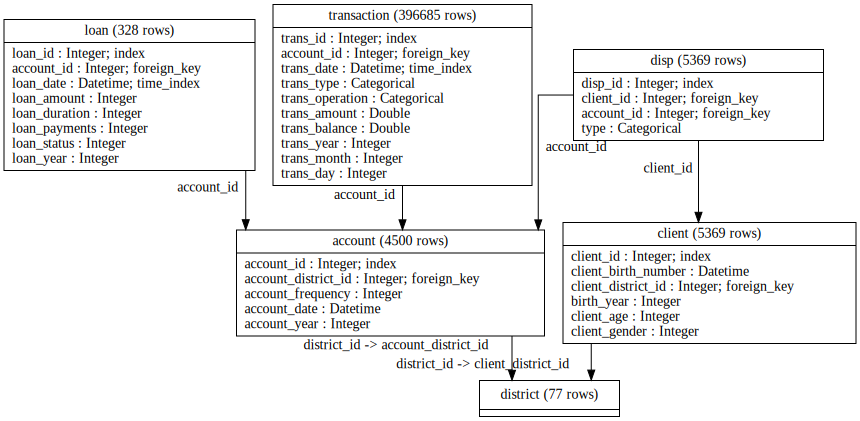

In [ ]:
import featuretools as ft

# refined_df = pd.get_dummies(refined_df, columns=[""])

# corr = refined_df.corr( method='pearson')
# sns.heatmap(corr);
# refined_df = loan_df.merge(disp_df, on='account_id')
# refined_df = refined_df.merge(client_df, on='client_id')
# refined_df = refined_df.merge(account_df, on='account_id')
# refined_df = refined_df.merge(district_df, left_on='client_district_id', right_on='district_id')
# refined_df = refined_df.merge(trans_df, on='account_id')


# refined_df_ft = refined_df_ft.merge(account_df, on='account_id')
# refined_df_ft = refined_df_ft.merge(district_df, left_on='client_district_id', right_on='district_id')
# refined_df_ft = refined_df_ft.merge(trans_df, on='account_id')
# print(refined_df_ft.head())
# #get merged data using featuretools
account_df.rename(columns={'district_id' : 'account_district_id'}, inplace=True)


# print(account_df.head())
# print(account_df.shape)
# print(account_df.isnull().sum())
# print(district_df.isnull().count())

# print(trans_df.isnull().count())
# print(loan_df.isnull().count())
# print(client_df.isnull().count())
# print(disp_df.isnull().count())


client = disp_df.merge(client_df, on='client_id')

disp = disp_df.drop("disp_id", axis=1)




ft_dataframes = {'loan': (loan_df, "loan_id","loan_date") ,'client': (client_df, "client_id"),
                 'district': (district_df,"district_id"), "account": (account_df, "account_id"),
    "transaction": (trans_df,"trans_id","trans_date"),"disp":(disp,"disp_id")}

relationships = [
              ("account","account_id","disp","account_id" ),("client","client_id","disp","client_id")  , ("account","account_id","loan","account_id"), 
              ("district","district_id","client","client_district_id"), ("district","district_id","account","account_district_id"),
                 ("account","account_id","transaction","account_id")]



features_entityset_md_2 = ft.EntitySet('features_entity', ft_dataframes, relationships)
features_entityset_md_2.plot()


In [ ]:
feature_matrix_loans_md_2, features_loans_defs = ft.dfs(
    dataframes=ft_dataframes,
    relationships=relationships,
    target_dataframe_name="loan",
    
    max_depth = 3, verbose = 1, n_jobs = 1
    
)

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_highly_null_features,
    remove_single_value_features,
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

feature_matrix_loans_md_2.head()
print(features_loans_defs)

ft.selection.remove_low_information_features(feature_matrix_loans_md_2, features_loans_defs)
ft.selection.remove_highly_null_features(feature_matrix_loans_md_2, features_loans_defs)
ft.selection.remove_single_value_features(feature_matrix_loans_md_2, features_loans_defs)
#eature_matrix_loans_md_2, features_loans_defs = ft.selection.remove_highly_correlated_features(feature_matrix_loans_md_2, features_loans_defs,pct_corr_threshold=0.95)
print(feature_matrix_loans_md_2.head())
print(features_loans_defs)

#feature_matrix_loans_md_2, features_loans_defs =ft.remove_low_information_features(feature_matrix_loans_md_2, features_loans_defs)
feature_matrix_enc_md_2, features_enc_md_2 = ft.encode_features(feature_matrix_loans_md_2, features_loans_defs)
#print(feature_matrix_enc_md_2.head())
#print(features_enc_md_2)
normMinMaxScaler = MinMaxScaler()
normRobustScaler = RobustScaler()
normStandardScaler = StandardScaler()


#Applying the normalization techniques
ft_df_rs_md_2 =  pd.DataFrame(normRobustScaler.fit_transform( feature_matrix_enc_md_2),columns= feature_matrix_enc_md_2.columns)
ft_df_mms_md_2 = pd.DataFrame(normMinMaxScaler.fit_transform(feature_matrix_enc_md_2), columns=feature_matrix_enc_md_2.columns)
ft_df_ss_md_2 = pd.DataFrame(normStandardScaler.fit_transform(feature_matrix_enc_md_2), columns=feature_matrix_enc_md_2.columns)
ft.save_features(features_enc_md_2, 'refined/features_loans_md_2.csv')
feature_matrix_enc_md_2.to_csv('refined/feature_matrix_enc_md_2.csv',sep=';',index=False)
ft_df_rs_md_2.to_csv('refined/ft_df_rs_md_2.csv',sep=';',index=False)
ft_df_mms_md_2.to_csv('refined/ft_df_mms_md_2.csv',sep=';',index=False)
ft_df_ss_md_2.to_csv('refined/ft_df_ss_md_2.csv',sep=';',index=False)



Built 235 features
Elapsed: 00:01 | Progress: 100%|██████████
[<Feature: account_id>, <Feature: loan_amount>, <Feature: loan_duration>, <Feature: loan_payments>, <Feature: loan_status>, <Feature: loan_year>, <Feature: DAY(loan_date)>, <Feature: MONTH(loan_date)>, <Feature: WEEKDAY(loan_date)>, <Feature: YEAR(loan_date)>, <Feature: account.account_district_id>, <Feature: account.account_frequency>, <Feature: account.account_year>, <Feature: account.COUNT(disp)>, <Feature: account.MODE(disp.type)>, <Feature: account.NUM_UNIQUE(disp.type)>, <Feature: account.COUNT(loan)>, <Feature: account.MAX(loan.loan_amount)>, <Feature: account.MAX(loan.loan_duration)>, <Feature: account.MAX(loan.loan_payments)>, <Feature: account.MAX(loan.loan_status)>, <Feature: account.MAX(loan.loan_year)>, <Feature: account.MEAN(loan.loan_amount)>, <Feature: account.MEAN(loan.loan_duration)>, <Feature: account.MEAN(loan.loan_payments)>, <Feature: account.MEAN(loan.loan_status)>, <Feature: account.MEAN(loan.loan_yea

In [ ]:
feature = features_enc_md_2[30]
print(ft.graph_feature(feature))

digraph "MONTH(loan_date) = 8" {
	graph [rankdir=LR]
	node [shape=plaintext]
	loan [label=<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="10">
    <TR>
        <TD colspan="1" bgcolor="#A9A9A9"><B>★ loan (target)</B></TD>
    </TR><TR><TD ALIGN="LEFT" port="loan_date">loan_date</TD></TR>
<TR><TD ALIGN="LEFT" port="MONTH(loan_date)">MONTH(loan_date)</TD></TR>

    <TR>
        <TD ALIGN="LEFT" port="MONTH(loan_date) = 8" BGCOLOR="#D9EAD3">MONTH(loan_date) = 8</TD>
    </TR>
</TABLE>>]
	node [shape=diamond]
	"0_MONTH(loan_date) = 8_equal_scalar" [label=<<FONT POINT-SIZE="12"><B>Step 2:</B>   Transform<BR></BR></FONT>EQUAL_SCALAR>]
	{
		rank=min
		"1_MONTH(loan_date)_month" [label=<<FONT POINT-SIZE="12"><B>Step 1:</B>   Transform<BR></BR></FONT>MONTH>]
	}
	node [shape=box]
	edge [dir=forward style=solid]
	"0_MONTH(loan_date) = 8_equal_scalar" -> loan:"MONTH(loan_date) = 8"
	"1_MONTH(loan_date)_month" -> loan:"MONTH(loan_date)"
	loan:loan_date -> "1_MONTH(loan_date)_month"


account_id                                         0
loan_amount                                        0
loan_duration                                      0
loan_payments                                      0
loan_status                                        0
                                                  ..
account.district.SUM(transaction.trans_amount)     0
account.district.SUM(transaction.trans_balance)    0
account.district.SUM(transaction.trans_day)        0
account.district.SUM(transaction.trans_month)      0
account.district.SUM(transaction.trans_year)       0
Length: 235, dtype: int64


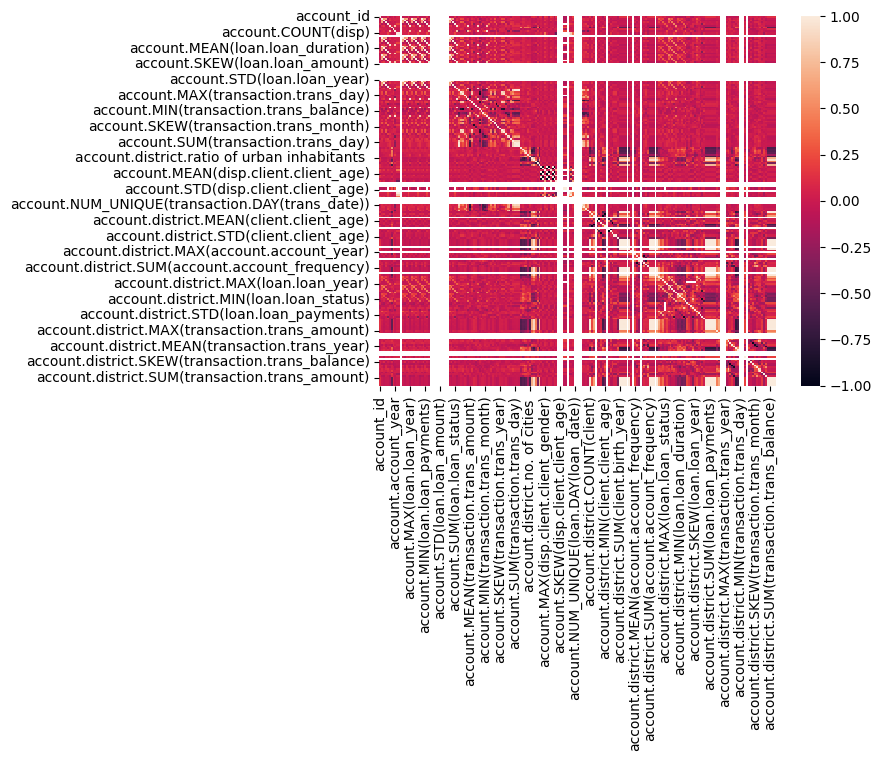

In [ ]:

print(feature_matrix_loans_md_2.isnull().sum())
corr = feature_matrix_loans_md_2.corr()
sns.heatmap(corr);

Built 467 features
Elapsed: 00:36 | Progress: 100%|██████████
[<Feature: account_id>, <Feature: loan_amount>, <Feature: loan_duration>, <Feature: loan_payments>, <Feature: loan_status>, <Feature: loan_year>, <Feature: DAY(loan_date)>, <Feature: MONTH(loan_date)>, <Feature: WEEKDAY(loan_date)>, <Feature: YEAR(loan_date)>, <Feature: account.account_district_id>, <Feature: account.account_frequency>, <Feature: account.account_year>, <Feature: account.COUNT(disp)>, <Feature: account.MODE(disp.type)>, <Feature: account.NUM_UNIQUE(disp.type)>, <Feature: account.COUNT(loan)>, <Feature: account.MAX(loan.loan_amount)>, <Feature: account.MAX(loan.loan_duration)>, <Feature: account.MAX(loan.loan_payments)>, <Feature: account.MAX(loan.loan_status)>, <Feature: account.MAX(loan.loan_year)>, <Feature: account.MEAN(loan.loan_amount)>, <Feature: account.MEAN(loan.loan_duration)>, <Feature: account.MEAN(loan.loan_payments)>, <Feature: account.MEAN(loan.loan_status)>, <Feature: account.MEAN(loan.loan_yea

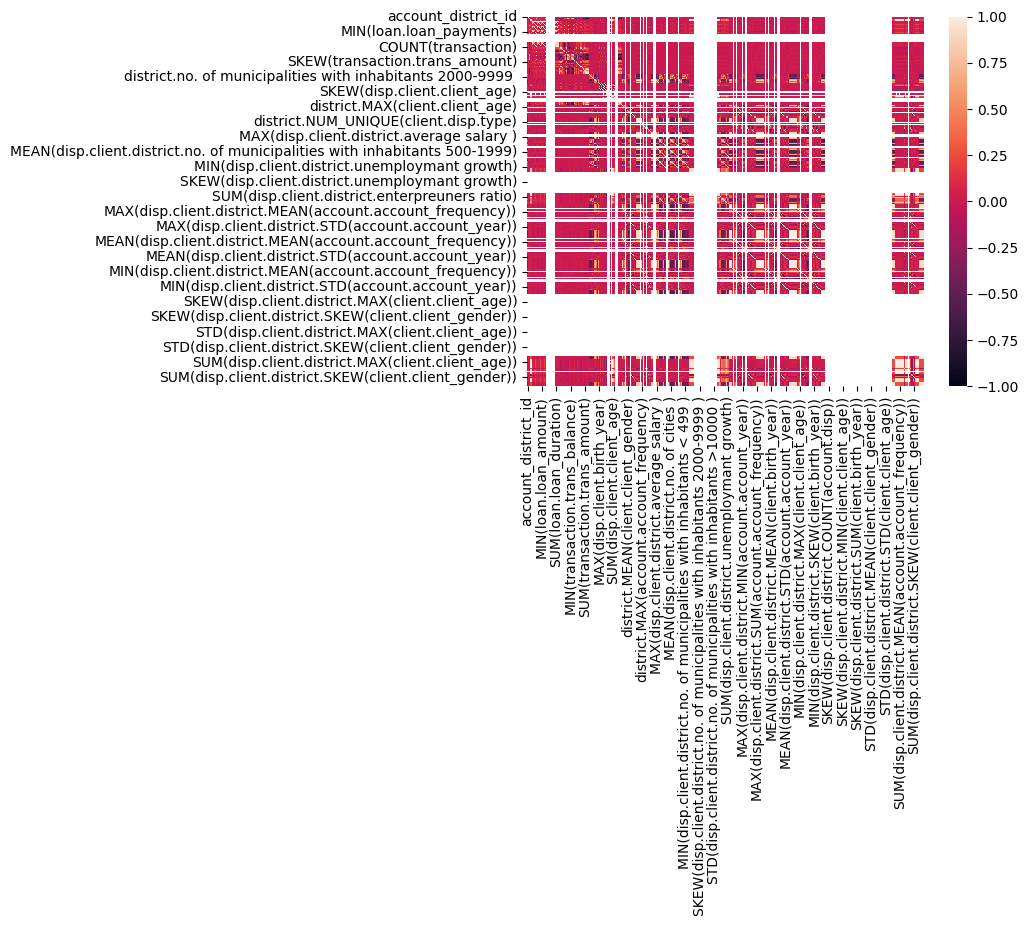

In [ ]:





features_entityset_md_4 = ft.EntitySet('features_entity', ft_dataframes, relationships)

feature_matrix_loans_md_4, features_loans_defs_md_4 = ft.dfs(
    dataframes=ft_dataframes,
    relationships=relationships,
    target_dataframe_name="account",
    max_depth = 4, verbose = 1, n_jobs = 1
    
)

feature_matrix_loans_md_4.head()
print(features_loans_defs)

feature_matrix_loans_md_4.to_csv('refined/ft_feature_matrix_loansv_md_4.csv',sep=';',index=False)
feature_matrix_loans_md_4.head()


corr = feature_matrix_loans_md_4.corr()
sns.heatmap(corr);

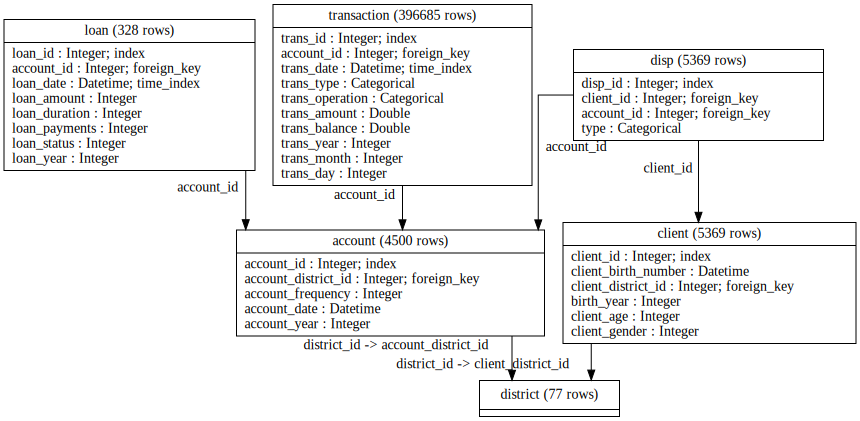

In [ ]:
features_entityset_md_4.plot()